# Import libraries

In [1]:
%load_ext autoreload
%autoreload
import pandas as pd
import re
import numpy as np
from  brand_and_updated_quant import find_company_name, update_quantities
import joblib
from merge_files import merge_ingredients, convert_x2x, str_to_bool
import os

In [2]:
newFileName = "thạch nổ" 

# Convert to xlsx

In [3]:
downloaded_folder = "./Downloads/"

# convert xls to xlsx files
download_directory = os.path.abspath(downloaded_folder)
convert_x2x(download_directory+'/')

# List all files in the download directory
files = [f for f in os.listdir(download_directory) if f.endswith('.xlsx')]

# Read each file and print the number of columns
for file in files:  
    file_path = os.path.join(download_directory, file)
    df = pd.read_excel(file_path)
    print(f"{file}: {df.shape[1]} columns")

10. Alginate  1.xlsx: 38 columns
9. Popping boba 1.xlsx: 38 columns


In [4]:
# convert xls to xlsx files
download_directory = os.path.abspath(downloaded_folder)
convert_x2x(download_directory+'/')

# List all files in the download directory
files = [f for f in os.listdir(download_directory) if f.endswith('.xlsx')]

# Read each file and print the number of columns




## Merge files

### Merge files and change column names

In [5]:
# export_data = input("Enter True or False: ")
export_data = "False"
try:
    export_data = str_to_bool(export_data)
    print(f"The boolean value is: {export_data}")
except ValueError as e:
    print(e)
    



The boolean value is: False


In [6]:
df = merge_ingredients(downloaded_folder+"/", export_data=export_data) 
df.head(5)

./Downloads\10. Alginate  1.xlsx
File: ./Downloads\10. Alginate  1.xlsx, Columns: 38
./Downloads\9. Popping boba 1.xlsx
File: ./Downloads\9. Popping boba 1.xlsx, Columns: 38


,Date,Mã_tờ_khai,Công_ty_nhập,Công_ty_nhập (TA),Địa_chỉ,Mã_số_thuế,Nhà_cung_cấp,Địa_chỉ_(ncc),Quốc_gia_xuất_xứ,Mã_nước_xuất_khẩu,...,海关代理代码,Cảng xuất,起运港代码,Cảng nhập,目的港代码,原产国,原产国家代码,承运人,追踪号,Sản phẩm
0,2025-11-28,107753390140,CÔNG TY TNHH MEGAELEC,TSE VIETNAM,"Số 02, Đường 7, Khu Công Nghiệp, Đô Thị Và Dịc...",2301081239,TIGERELEC CO LTD,"33, YEOMJEON-RO 187 BEON-GIL, MICHUHOL-GU, INC...",SOUTH KOREA,NaN,...,HQTIENSON,NaN,NaN,NaN,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate
1,2025-11-25,107737384050,CÔNG TY CỔ PHẦN TRANG THIẾT BỊ Y TẾ MẠNH CƯỜNG,MANH CUONG MEDICAL EQUIPMENT JOINT STOCK COMPANY,"Số Nhà 14A2 Đầm Trấu, Phường Bạch Đằng, Quận H...",0107746048,GUANGXI PINGXIANG SHENGQI INVESTMENT CO LTD,"NO. 108-2, NORTH RING ROAD, PINGXIANG CITY, CH...",CHINA,NaN,...,HQHUUNGHI,NaN,NaN,NaN,NaN,CHINA,CN,NaN,NaN,Alginate
2,2025-11-25,107737384050,CÔNG TY CỔ PHẦN TRANG THIẾT BỊ Y TẾ MẠNH CƯỜNG,MANH CUONG MEDICAL EQUIPMENT JOINT STOCK COMPANY,"Số Nhà 14A2 Đầm Trấu, Phường Bạch Đằng, Quận H...",0107746048,GUANGXI PINGXIANG SHENGQI INVESTMENT CO LTD,"NO. 108-2, NORTH RING ROAD, PINGXIANG CITY, CH...",CHINA,NaN,...,HQHUUNGHI,NaN,NaN,NaN,NaN,CHINA,CN,NaN,NaN,Alginate
3,2025-11-24,107731527260,CÔNG TY TNHH DONGYANGNONGSAN,DONGYANGNONGSAN COMPANY LIMITED,"Lô 13 Cụm Công Nghiệp Lại Yên, Xã Lại Yên, Huy...",0105670033,ARENA BIZ CO LTD,"6F DAEWON B/D, 30 NONHYEON-RO 28-GIL, GANGNAM-...",SOUTH KOREA,NaN,...,HQHPKV2,NaN,NaN,NaN,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate
4,2025-11-22,107731570000,CÔNG TY TNHH ĐIỆN TỬ NARET,NARET ELECTRONICS COMPANY LIMITED,"Thôn Tử Đông, Xã Lý Thường Kiệt, Huyện Yên Mỹ,...",0900882192,NR G C CO,"23, EMTIBEUI 1-RO, 91 BEON-GIL, DANWON-GU, ANS...",SOUTH KOREA,NaN,...,HQHUNGYEN,NaN,NaN,NaN,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate


In [7]:
df.shape

(1710, 39)

In [8]:
df_to_clean =df.copy()
df_to_clean.head(5)

,Date,Mã_tờ_khai,Công_ty_nhập,Công_ty_nhập (TA),Địa_chỉ,Mã_số_thuế,Nhà_cung_cấp,Địa_chỉ_(ncc),Quốc_gia_xuất_xứ,Mã_nước_xuất_khẩu,...,海关代理代码,Cảng xuất,起运港代码,Cảng nhập,目的港代码,原产国,原产国家代码,承运人,追踪号,Sản phẩm
0,2025-11-28,107753390140,CÔNG TY TNHH MEGAELEC,TSE VIETNAM,"Số 02, Đường 7, Khu Công Nghiệp, Đô Thị Và Dịc...",2301081239,TIGERELEC CO LTD,"33, YEOMJEON-RO 187 BEON-GIL, MICHUHOL-GU, INC...",SOUTH KOREA,NaN,...,HQTIENSON,NaN,NaN,NaN,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate
1,2025-11-25,107737384050,CÔNG TY CỔ PHẦN TRANG THIẾT BỊ Y TẾ MẠNH CƯỜNG,MANH CUONG MEDICAL EQUIPMENT JOINT STOCK COMPANY,"Số Nhà 14A2 Đầm Trấu, Phường Bạch Đằng, Quận H...",0107746048,GUANGXI PINGXIANG SHENGQI INVESTMENT CO LTD,"NO. 108-2, NORTH RING ROAD, PINGXIANG CITY, CH...",CHINA,NaN,...,HQHUUNGHI,NaN,NaN,NaN,NaN,CHINA,CN,NaN,NaN,Alginate
2,2025-11-25,107737384050,CÔNG TY CỔ PHẦN TRANG THIẾT BỊ Y TẾ MẠNH CƯỜNG,MANH CUONG MEDICAL EQUIPMENT JOINT STOCK COMPANY,"Số Nhà 14A2 Đầm Trấu, Phường Bạch Đằng, Quận H...",0107746048,GUANGXI PINGXIANG SHENGQI INVESTMENT CO LTD,"NO. 108-2, NORTH RING ROAD, PINGXIANG CITY, CH...",CHINA,NaN,...,HQHUUNGHI,NaN,NaN,NaN,NaN,CHINA,CN,NaN,NaN,Alginate
3,2025-11-24,107731527260,CÔNG TY TNHH DONGYANGNONGSAN,DONGYANGNONGSAN COMPANY LIMITED,"Lô 13 Cụm Công Nghiệp Lại Yên, Xã Lại Yên, Huy...",0105670033,ARENA BIZ CO LTD,"6F DAEWON B/D, 30 NONHYEON-RO 28-GIL, GANGNAM-...",SOUTH KOREA,NaN,...,HQHPKV2,NaN,NaN,NaN,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate
4,2025-11-22,107731570000,CÔNG TY TNHH ĐIỆN TỬ NARET,NARET ELECTRONICS COMPANY LIMITED,"Thôn Tử Đông, Xã Lý Thường Kiệt, Huyện Yên Mỹ,...",0900882192,NR G C CO,"23, EMTIBEUI 1-RO, 91 BEON-GIL, DANWON-GU, ANS...",SOUTH KOREA,NaN,...,HQHUNGYEN,NaN,NaN,NaN,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate


# Add day, month, year

In [9]:
# Convert the 'Date' column to datetime if it's not already
df_to_clean['Date'] = pd.to_datetime(df_to_clean['Date'], format='%Y-%m-%d')

# Extract day, month, and year into separate columns
df_to_clean['Day'] = df_to_clean['Date'].dt.day
df_to_clean['Month'] = df_to_clean['Date'].dt.month
df_to_clean['Year'] = df_to_clean['Date'].dt.year

df_to_clean.insert(df_to_clean.columns.get_loc('Date')+1, 'Day', df_to_clean.pop('Day'))
df_to_clean.insert(df_to_clean.columns.get_loc('Date')+2, 'Month', df_to_clean.pop('Month'))
df_to_clean.insert(df_to_clean.columns.get_loc('Date')+3, 'Year', df_to_clean.pop('Year'))

# Check Duplicate

In [10]:
# Assuming 'Mã_tờ_khai 11 số' is a string column
df_to_clean['Mã_tờ_khai 11 số'] = df_to_clean['Mã_tờ_khai'].astype(str).str[:11] + df_to_clean['Số_lượng'].astype(str) + df_to_clean['Thành_tiền'].astype(str)


# Create a boolean mask for duplicated rows
duplicated_rows = df_to_clean.duplicated(subset='Mã_tờ_khai 11 số', keep='first')

# Update 'Duplicated_MTK' column for rows beyond the first occurrence
df_to_clean['is_duplicated']= duplicated_rows.astype(int)
df_to_clean = df_to_clean.drop(['Mã_tờ_khai 11 số'], axis=1)

# Update the first occurrence as 0
df_to_clean.loc[duplicated_rows, 'is_duplicated'] = 1
# df.to_excel("{}/{} {} renamed.xlsx".format(chat, chat, time), index=False, header=True)

# Updated Quantity, Price, Brand

In [11]:
# Calculate updated price based on Thành_tiền / Updated_Số_lượng

# Define a function to apply
def calculate_updated_đơn_giá(row):
    if row['Updated_Số_lượng'] != 0:
        return row['Thành_tiền'] / row['Updated_Số_lượng']
    else:
        return 0  # Return 0 if Updated_Số_lượng is 0 to avoid division by zero
    
def extract_after_keywords(text):
    keywords = ["tổng hợp","quốc tế","dịch vụ","thương mại", "TM", "sản xuất", "cổ phần", "MTV", "một thành viên", "TNHH", "trách nhiệm hữu hạn"]
    
    # Convert text to lowercase for case-insensitive search
    text_lower = text.lower()
    if text_lower.find("nhà ga"):
        keywords.pop(0)
    for keyword in keywords:
        keyword_lower = keyword.lower()
        if keyword_lower in text_lower:
            start_index = text_lower.find(keyword_lower) + len(keyword_lower)
            result = text[start_index:].strip().replace("XUẤT NHẬP KHẨU", "XNK")
            return result
    
    return text # Return None if none of the keywords are found

# Example usage
text = "Công ty TNHH nhà ga quốc tế ABC"
result = extract_after_keywords(text)
print(result)  # Output: "ABC"


ABC


In [12]:
from brand_and_updated_quant import find_company_name, update_quantities
# Make a safepoint
data_for_valid = df_to_clean.copy()

# data_for_valid['Hợp_lệ'] = data_for_valid['Hợp_lệ'].map({1: "có", 0: "không"})

# data_for_valid = valid_df.copy()
data_for_valid['Brand'] = data_for_valid['Mô_tả_sản_phẩm'].apply(find_company_name)
data_for_valid.insert(data_for_valid.columns.get_loc('Mô_tả_sản_phẩm') + 1, 'Brand', data_for_valid.pop('Brand'))

# Add updated quantity and unit columns
data_for_valid['Updated_Số_lượng'] = data_for_valid.apply(update_quantities, axis=1)
data_for_valid['Updated_Đơn_vị'] = ["kilogram"] * len(data_for_valid)
data_for_valid.insert(data_for_valid.columns.get_loc('Brand') + 1, 'Updated_Số_lượng', data_for_valid.pop('Updated_Số_lượng'))
data_for_valid.insert(data_for_valid.columns.get_loc('Brand') + 2, 'Updated_Đơn_vị', data_for_valid.pop('Updated_Đơn_vị'))

# Calculate updated price
data_for_valid['Updated_Đơn_giá'] = data_for_valid.apply(lambda row: calculate_updated_đơn_giá(row), axis=1)
data_for_valid.insert(data_for_valid.columns.get_loc('Đơn_giá'), 'Updated_Đơn_giá', data_for_valid.pop('Updated_Đơn_giá'))

# Vlookup for market classification
df_marketclass = pd.read_excel('../../Data/Data for fill data/Updated dim_company_marketType.xlsx', sheet_name='phân loại thị trường')
df_marketclass.columns = df_marketclass.columns.str.strip()  # Loại bỏ khoảng trắng đầu/cuối nếu có
# Ensure that the column 'Công_ty_nhập' exists in df_marketclass
print(df_marketclass.columns)
df_marketclass['Công_ty_nhập'] = df_marketclass['Công_ty_nhập'].fillna('Unknown')  # Thay NaN bằng một giá trị mặc định


# Ensure 'export_data' is defined and has the correct value
if export_data == False:
    company = 'Công_ty_nhập'
    parent_company = 'Công ty nhập gộp'
else:
    company = 'Nhà_cung_cấp'
    parent_company = 'Nhà cung cấp gộp'

# Ensure that the 'company' column exists in 'data_for_valid'
if company not in data_for_valid.columns:
    raise KeyError(f"Column '{company}' does not exist in data_for_valid.")

# Perform the merge
lookup_data = data_for_valid[company]
lookup_data.name = company

# Ensure the column 'Công_ty_nhập' exists in df_marketclass
if 'Công_ty_nhập' not in df_marketclass.columns:
    raise KeyError("'Công_ty_nhập' column is missing in df_marketclass.")

result_df = pd.merge(lookup_data, df_marketclass, on='Công_ty_nhập', how='left')

# Ensure the length of result_df matches data_for_valid
result_df = result_df.iloc[:len(data_for_valid)]
result_df = result_df.set_index(data_for_valid.index)

# Set the index to match data_for_valid
result_df = result_df.set_index(data_for_valid.index)

# Add market classification to data_for_valid
comp_nice_name = company.lower().replace('_', " ")
data_for_valid['MarketClassification'] = result_df['MarketClassification']
data_for_valid[f'Phân loại {comp_nice_name}'] = result_df['Phân loại công ty nhập']
data_for_valid[parent_company] = result_df['Công ty nhập gộp']
data_for_valid.insert(data_for_valid.columns.get_loc(company) + 1, parent_company, data_for_valid.pop(parent_company))


Index(['Công_ty_nhập', 'Mã số thuế', 'Địa chỉ', 'MarketClassification',
       'Phân loại công ty nhập', 'Công ty nhập gộp', 'Unnamed: 6',
       'Unnamed: 7'],
      dtype='object')


In [13]:
# Apply the function to fill in the 'Công ty nhập gộp' column
data_for_valid[parent_company] = data_for_valid[parent_company].fillna(
    data_for_valid[company].apply(extract_after_keywords)
)

## Adding to blank CTN gop

## Tuning price

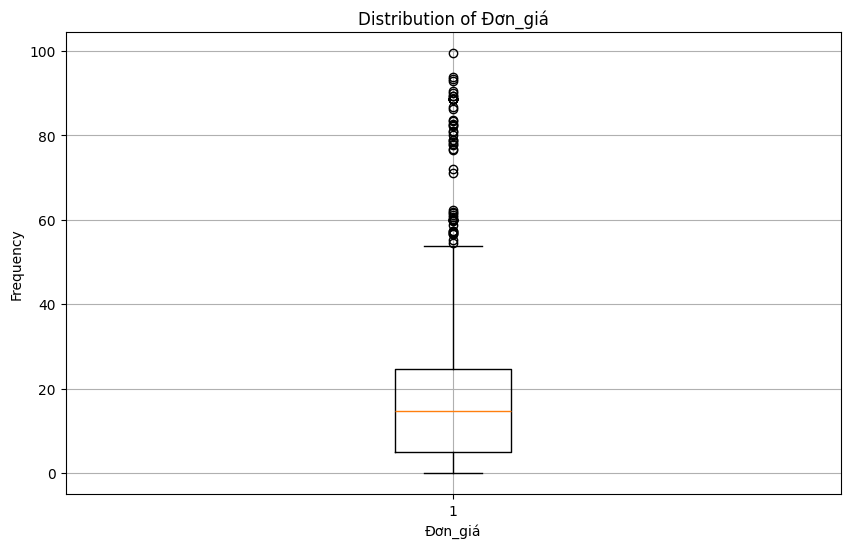

In [14]:
import matplotlib.pyplot as plt
test =data_for_valid[data_for_valid['Updated_Đơn_giá']<100]

# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 6))
plt.boxplot(test['Updated_Đơn_giá'])
plt.title('Distribution of Đơn_giá')
plt.xlabel('Đơn_giá')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [15]:
print(data_for_valid['Updated_Đơn_giá'].mode().iloc[0])
print(data_for_valid['Updated_Đơn_giá']) 

14.7
0        3.420000
1        3.600000
2        6.000000
3        1.188033
4        2.520000
          ...    
1705     2.117647
1706    20.520000
1707     2.117647
1708     2.117647
1709     2.117647
Name: Updated_Đơn_giá, Length: 1710, dtype: float64


In [16]:
# Price tuning removed - keeping simple calculation: Thành_tiền / Updated_Số_lượng
print("Price tuning feature has been removed")
print("Updated_Đơn_giá is now calculated as: Thành_tiền / Updated_Số_lượng")

Price tuning feature has been removed
Updated_Đơn_giá is now calculated as: Thành_tiền / Updated_Số_lượng


In [17]:
# Price tuning logic removed
# Updated_Đơn_giá is now calculated directly as Thành_tiền / Updated_Số_lượng
# No additional price adjustments or bounds checking
print("✅ Price tuning logic has been completely removed")
print("✅ Updated_Đơn_giá calculation is now simplified to: Thành_tiền / Updated_Số_lượng")

✅ Price tuning logic has been completely removed
✅ Updated_Đơn_giá calculation is now simplified to: Thành_tiền / Updated_Số_lượng


In [18]:
data_for_valid['Updated_Đơn_giá']

0        3.420000
1        3.600000
2        6.000000
3        1.188033
4        2.520000
          ...    
1705     2.117647
1706    20.520000
1707     2.117647
1708     2.117647
1709     2.117647
Name: Updated_Đơn_giá, Length: 1710, dtype: float64

## Process Hop_le

In [19]:
def custom_preprocessor(text):
    # Remove non-alphabetic characters, keeping both English and Vietnamese alphabets
    text = re.sub("[^a-zA-Zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễđìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹ]", " ", text)
    # Remove specified words
    exclusion_list = []

    # Remove weight units
    weight_units = ["kilogram","kilograms","kg","kgs","kgm","kgms","gm","gms","g", "gram", "grams", "ml",
                    "lb", "pound", "pounds", "oz", "ounce", "ounces", "unit", "units","pce","ton","cubic meter",
                    "tne","ton","milligram","mg","microgram","µg","metric ton","tonne","stone","st","cara","car",
                    "ct","grain","gr","pce", 'lit']
    exclusion_list += weight_units
    
    text = " ".join(word for word in text.split() if word.lower() not in exclusion_list)
    return text

### Option San pham, description column

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.load_model('./models/Model AI/ingre_w_all_CatBoosting_model')

tfidf_vectorizer = joblib.load('./models/Model AI/ingre_w_all_fidf_vectorizer.joblib')
tfidf_vectorizer.preprocessor = custom_preprocessor  # Set the custom preprocessor

# create validity column
data_for_valid['Mô_tả_sản_phẩm'] = data_for_valid['Mô_tả_sản_phẩm'].str.lower()
product_des = tfidf_vectorizer.transform(data_for_valid["Mô_tả_sản_phẩm"]).toarray()

# Check if 'Sản phẩm' column exists, if not create it with empty string
if 'Sản phẩm' not in data_for_valid.columns:
    data_for_valid['Sản phẩm'] = ''
    print("⚠️ Cột 'Sản phẩm' không tồn tại, đã tạo cột trống")

ingre = data_for_valid['Sản phẩm'].astype(str).fillna('NaN').values.reshape(-1,1)

# price = data_for_valid['Thành_tiền'].values.reshape(-1,1)
# X_new = np.concatenate((price, ingre, product_des), axis=1)
X_new = np.concatenate((ingre, product_des), axis=1)


data_for_valid['Hợp_lệ'] = classifier.predict(X_new)
data_for_valid.insert(data_for_valid.columns.get_loc('Brand') + 1, 'Hợp_lệ', data_for_valid.pop('Hợp_lệ'))

c:\Users\Doan Duy Thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Doan Duy Thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Option Price, quantity, description column

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
# classifier.load_model('quantity_w_huong_CatBoosting_model')
classifier.load_model('./models/Model AI/price_w_all_ingredients_CatBoosting_model')

# tfidf_vectorizer = joblib.load('quantity_w_huong_tfidf_vectorizer.joblib')
tfidf_vectorizer = joblib.load('./models/Model AI/price_w_all_ingredients_tfidf_vectorizer.joblib')

tfidf_vectorizer.preprocessor = custom_preprocessor  # Set the custom preprocessor

# create validity column
data_for_valid['Mô_tả_sản_phẩm'] = data_for_valid['Mô_tả_sản_phẩm'].str.lower()
product_des = tfidf_vectorizer.transform(data_for_valid["Mô_tả_sản_phẩm"]).toarray()

quantity = data_for_valid['Số_lượng'].values.reshape(-1,1)
X_new = np.concatenate((quantity, product_des), axis=1)
# price = data_for_valid['Thành_tiền'].values.reshape(-1,1)
# X_new = np.concatenate((price, product_des), axis=1)


data_for_valid['Hợp_lệ'] = classifier.predict(X_new)
data_for_valid.insert(data_for_valid.columns.get_loc('Brand') + 1, 'Hợp_lệ', data_for_valid.pop('Hợp_lệ'))

c:\Users\Doan Duy Thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Doan Duy Thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [22]:
# Mapping mã cảng sang tên cảng đầy đủ
def map_port_codes(port_code):
    """
    Mapping mã cảng sang tên cảng đầy đủ
    """
    port_mapping = {
        # Cảng Sài Gòn
        'HQSGKV1': 'Cảng Sài Gòn KV1',
        'HQSGKV2': 'Cảng Sài Gòn KV2', 
        'HQSGKV3': 'Cảng Sài Gòn KV3',
        'HQSGKV4': 'Cảng Sài Gòn KV4',
        
        # Cảng Hải Phòng
        'HQHPKV1': 'Cảng Hải Phòng KV1',
        'HQHPKV2': 'Cảng Hải Phòng KV2',
        'HQHPKV3': 'Cảng Hải Phòng KV3',
        
        # Cảng Nội Bài
        'HQCNC': 'Cảng Nội Bài',
        
        # Cảng Phú Mỹ
        'HQCPNHCM': 'Cảng Phú Mỹ HCM',
        'HQCPNHN': 'Cảng Phú Mỹ Hà Nội',
        
        # Cảng Đình Vũ
        'HQDINHVU': 'Cảng Đình Vũ',
        
        # Cảng Tân Sơn Nhất
        'HQTSNHAT': 'Cảng Tân Sơn Nhất',
        
        # Cảng Tiên Sơn
        'HQTIENSON': 'Cảng Tiên Sơn',
        
        # Cảng Đà Nẵng
        'CKCDANANG': 'Cảng Đà Nẵng',
        'HQCKCDNA': 'Cảng Đà Nẵng',
        
        # Cảng Quy Nhon
        'CKQUYNHON': 'Cảng Quy Nhon',
        
        # Cảng Lao Bảo
        'CKLAOBAO': 'Cảng Lao Bảo',
        
        # Cảng Cà Mau
        'HQCAMAU': 'Cảng Cà Mau',
        
        # Cảng Vinh
        'HQVINH': 'Cảng Vinh',
        
        # Các cảng địa phương khác
        'HQBACGIANG': 'Cảng Bắc Giang',
        'HQBACHN': 'Cảng Bắc Ninh',
        'HQBACNINH': 'Cảng Bắc Ninh',
        'HQBACTL': 'Cảng Bắc Thái Lan',
        'HQBTHUAN': 'Cảng Bình Thuận',
        'HQCKCKYHA': 'Cảng Kỳ Hà',
        'HQCOCNAM': 'Cảng Ô Cầu Nam',
        'HQDALAT': 'Cảng Đà Lạt',
        'HQDONGDANG': 'Cảng Đồng Đăng',
        'HQHAIDUONG': 'Cảng Hải Dương',
        'HQHANAM': 'Cảng Hà Nam',
        'HQHGCT': 'Cảng Hồng Gai',
        'HQHOABINH': 'Cảng Hòa Bình',
        'HQHOALAC': 'Cảng Hòa Lạc',
        'HQHUNGYEN': 'Cảng Hưng Yên',
        'HQHUUNGHI': 'Cảng Hữu Nghị',
        'HQKCNQNGAI': 'Cảng KCN Quảng Ngãi',
        'HQKCXKCNHP': 'Cảng KCX KCN Hải Phòng',
        'HQLTRUNG1': 'Cảng Lạng Trung 1',
        'HQLTRUNG2': 'Cảng Lạng Trung 2',
        'HQNAMDINH': 'Cảng Nam Định',
        'HQNINHBINH': 'Cảng Ninh Bình',
        'HQNOIBAI': 'Cảng Nội Bài',
        'HQQTLAOCAI': 'Cảng Quốc tế Lào Cai',
        'HQTANTHANH': 'Cảng Tân Thành',
        'HQTDMOT': 'Cảng Tân Định Một',
        'HQTHAIBINH': 'Cảng Thái Bình',
        'HQTNGUYEN': 'Cảng Tân Nguyên',
        'HQTTHUAN': 'Cảng Tân Thuận',
        'HQVIETTRI': 'Cảng Việt Trì',
        'HQVINHPHUC': 'Cảng Vĩnh Phúc',
        'HQYENPHONG': 'Cảng Yên Phong',
        'HQYENVIEN': 'Cảng Yên Viên',
        
        # Các khu công nghiệp
        'KCNVNSGBD': 'KCN Việt Nam-Singapore',
        'KCNSTHANBD': 'KCN Sông Than',
        'KCXLBINHDN': 'KCX Lê Bình Đà Nẵng',
        'KTMCNMBTN': 'KTM Công nghiệp Miền Bắc',
        
        # Các cảng khác
        'BENTRELA': 'Cảng Bến Tre',
        'BIENHOADN': 'Cảng Biên Hòa',
        'CAIMEPVT': 'Cảng Cái Mép',
        'CAOLANHCDT': 'Cảng Cao Lãnh',
        'CATLOVT': 'Cảng Cát Lở',
        'CKCAUTREO': 'Cảng Cầu Treo',
        'CKCCAMRANH': 'Cảng Cam Ranh',
        'CKCLONGAN': 'Cảng Long An',
        'CKHONGAI': 'Cảng Hồng Ngài',
        'CKQTCHALO': 'Cảng Quốc tế Cha Lo',
        'CNQUANGNAM': 'Cảng Quảng Nam',
        'CSANBAYVT': 'Cảng Sân bay Vũng Tàu',
        'CTHANHBP': 'Cảng Thành Bình Phước',
        'CTHOPBD': 'Cảng Thọ Bình Định',
        'DNVMPBD': 'Cảng Đà Nẵng VMP',
        'DNVTBANGTN': 'Cảng Đà Nẵng VT Bằng Tân',
        'DUCHOALA': 'Cảng Dục Hòa',
        'KCNDANANG': 'KCN Đà Nẵng',
        'MYTHOLA': 'Cảng Mỹ Tho',
        'NTRACHDN': 'Cảng Núi Thành Đà Nẵng',
        'NVPMYBRVT': 'Cảng NVP Mỹ Bà Rịa Vũng Tàu',
        'SONGTHANBD': 'Cảng Sông Than Bình Dương',
        'TAYDOCT': 'Cảng Tây Đô',
        'TNHATDN': 'Cảng Tân Nhật Đà Nẵng',
        'VHUONGBD': 'Cảng Vườn Hương Bình Dương',
        'VINHLONGCT': 'Cảng Vĩnh Long',
    }
    
    return port_mapping.get(port_code, port_code)  # Trả về mã gốc nếu không tìm thấy

# Cập nhật cột Cảng nhập với tên cảng đầy đủ
print("🔄 Đang cập nhật tên cảng nhập...")
# Check if '海关代理代码' column exists
if '海关代理代码' in data_for_valid.columns:
    data_for_valid['Cảng nhập'] = data_for_valid['海关代理代码'].apply(map_port_codes)
else:
    print("⚠️ Cột '海关代理代码' không tồn tại, sử dụng cột 'Cảng nhập' hiện có")
    if 'Cảng nhập' not in data_for_valid.columns:
        data_for_valid['Cảng nhập'] = ''

# Hiển thị thống kê
port_counts = data_for_valid['Cảng nhập'].value_counts()
print(f"📊 Tổng số cảng khác nhau: {len(port_counts)}")
print(f"📈 Top 10 cảng phổ biến nhất:")
print(port_counts.head(10))

print("✅ Hoàn thành cập nhật tên cảng nhập!")

# =============================================================================
# CẬP NHẬT CÔNG TY NHẬP GỘP VÀ THÊM CÁC CỘT MỚI
# =============================================================================

print("\n🔄 Đang cập nhật công ty nhập gộp và thêm các cột mới...")

# 1. Đọc file dim cty nhập để merge
try:
    # Đường dẫn file dim cty nhập
    dim_file_path = "dim_cty_nhập.xlsx"
    
    if os.path.exists(dim_file_path):
        print(f"📖 Đang đọc file dim cty nhập: {dim_file_path}")
        df_dim = pd.read_excel(dim_file_path)
        df_dim.columns = df_dim.columns.str.strip()
        
        print(f"📊 File dim có {len(df_dim)} dòng dữ liệu")
        print(f"📋 Các cột trong file dim: {list(df_dim.columns)}")
        
        # 2. Merge trực tiếp từ file dim sang cột "Công ty nhập gộp"
        print("🔄 Đang merge công ty nhập gộp...")
        
        # Sửa encoding và chuẩn hóa tên công ty trong file dim
        def fix_encoding(text):
            if pd.isna(text):
                return text
            
            # Sửa các ký tự bị lỗi encoding phổ biến
            replacements = {
                'Cã´Ng Ty': 'CÔNG TY',
                'Tnhh': 'TNHH',
                'Viá»‡T Nam': 'VIỆT NAM',
                'Cá» Pháº§n': 'CỔ PHẦN',
                'Thæ°Æ¡Ng': 'THƯƠNG',
                'Máº¡I': 'MẠI',
                'Dá»‹Ch': 'DỊCH',
                'Vá»': 'VỤ',
                'NÆ°Á»›C': 'NƯỚC',
                'Giáº£i': 'GIẢI',
                'KhÃ¡T': 'KHÁT',
                'COLA': 'COLA',
                'Táº¡I': 'TẠI',
                'Ä\x90Ã': 'ĐÀ',
                'NÁºµNG': 'NẴNG',
                'CHI NHÃ¡NH': 'CHI NHÁNH',
                'CÃ´NG': 'CÔNG',
                'NÆ°Á»›C': 'NƯỚC',
                'GIÁº£I': 'GIẢI',
                'KHÃ¡T': 'KHÁT',
                'VIÁ»‡T': 'VIỆT',
                'TÁº¡I': 'TẠI',
                'Ä\x90Ã': 'ĐÀ',
                'NÁºµNG': 'NẴNG'
            }
            
            text_str = str(text)
            for wrong, correct in replacements.items():
                text_str = text_str.replace(wrong, correct)
            
            # Chuẩn hóa: loại bỏ khoảng trắng thừa và chuyển thành uppercase
            text_str = ' '.join(text_str.split()).upper()
            return text_str
        
        # Chuẩn hóa tên công ty trong data_for_valid để so sánh
        def normalize_company_name(text):
            if pd.isna(text):
                return text
            return ' '.join(str(text).split()).upper()
        
        # Áp dụng sửa encoding cho cột CTY nhập
        df_dim['CTY nhập_fixed'] = df_dim['CTY nhập'].apply(fix_encoding)
        
        # Chuẩn hóa tên công ty trong data_for_valid
        data_for_valid['Công_ty_nhập_normalized'] = data_for_valid['Công_ty_nhập'].apply(normalize_company_name)
        
        # Merge dựa vào tên công ty đã chuẩn hóa
        data_for_valid = data_for_valid.merge(
            df_dim[['CTY nhập_fixed', 'ctynhapgop']], 
            left_on='Công_ty_nhập_normalized', 
            right_on='CTY nhập_fixed',
            how='left'
        )
        
        # Đổi tên cột ctynhapgop thành "Công ty nhập gộp" để dễ sử dụng
        data_for_valid['Công ty nhập gộp'] = data_for_valid['ctynhapgop']
        
        # Xóa các cột không cần thiết
        data_for_valid = data_for_valid.drop(['CTY nhập_fixed', 'ctynhapgop', 'Công_ty_nhập_normalized'], axis=1, errors='ignore')
        
        # Đếm số bản ghi được merge
        mapped_count = data_for_valid['Công ty nhập gộp'].notna().sum()
        total_count = len(data_for_valid)
        print(f"✅ Đã merge {mapped_count}/{total_count} bản ghi ({mapped_count/total_count*100:.1f}%)")
        
        # 3. Thêm cột "Nhà Cung Cấp Gộp" sau cột "Nhà_cung_cấp"
        print("🔄 Đang thêm cột Nhà Cung Cấp Gộp...")
        
        # Merge nhà cung cấp gộp nếu có trong file dim
        if 'Nhà cung cấp gộp' in df_dim.columns:
            data_for_valid = data_for_valid.merge(
                df_dim[['Nhà_cung_cấp', 'Nhà cung cấp gộp']], 
                on='Nhà_cung_cấp', 
                how='left'
            )
            print("✅ Đã thêm cột Nhà Cung Cấp Gộp")
        else:
            # Nếu không có cột nhà cung cấp gộp, tạo cột trống
            data_for_valid['Nhà Cung Cấp Gộp'] = None
            print("⚠️ Không tìm thấy cột 'Nhà cung cấp gộp' trong file dim, tạo cột trống")
        
        # 4. Thêm cột "Thương hiệu gộp" sau cột "Brand"
        print("🔄 Đang thêm cột Thương hiệu gộp...")
        
        # Merge thương hiệu gộp nếu có trong file dim
        if 'Thương hiệu gộp' in df_dim.columns:
            data_for_valid = data_for_valid.merge(
                df_dim[['Brand', 'Thương hiệu gộp']], 
                on='Brand', 
                how='left'
            )
            print("✅ Đã thêm cột Thương hiệu gộp")
        else:
            # Nếu không có cột thương hiệu gộp, tạo cột trống
            data_for_valid['Thương hiệu gộp'] = None
            print("⚠️ Không tìm thấy cột 'Thương hiệu gộp' trong file dim, tạo cột trống")
        
        # 5. Sắp xếp lại vị trí các cột
        print("🔄 Đang sắp xếp lại vị trí các cột...")
        
        # Tìm vị trí cột "Nhà_cung_cấp" và chèn "Nhà Cung Cấp Gộp" sau nó
        ncc_position = data_for_valid.columns.get_loc('Nhà_cung_cấp')
        data_for_valid.insert(ncc_position + 1, 'Nhà Cung Cấp Gộp', data_for_valid.pop('Nhà Cung Cấp Gộp'))
        
        # Tìm vị trí cột "Brand" và chèn "Thương hiệu gộp" sau nó
        brand_position = data_for_valid.columns.get_loc('Brand')
        data_for_valid.insert(brand_position + 1, 'Thương hiệu gộp', data_for_valid.pop('Thương hiệu gộp'))
        
        print("✅ Đã sắp xếp lại vị trí các cột")
        
        # 6. Hiển thị thống kê
        print(f"\n📊 Thống kê sau khi cập nhật:")
        print(f"  - Tổng số bản ghi: {len(data_for_valid)}")
        print(f"  - Công ty nhập gộp được merge: {data_for_valid['Công ty nhập gộp'].notna().sum()}")
        print(f"  - Nhà cung cấp gộp được merge: {data_for_valid['Nhà Cung Cấp Gộp'].notna().sum()}")
        print(f"  - Thương hiệu gộp được merge: {data_for_valid['Thương hiệu gộp'].notna().sum()}")
        
        # Hiển thị top 5 công ty nhập gộp
        if data_for_valid['Công ty nhập gộp'].notna().any():
            print(f"\n📈 Top 5 công ty nhập gộp:")
            print(data_for_valid['Công ty nhập gộp'].value_counts().head())
        
    else:
        print(f"❌ Không tìm thấy file dim cty nhập: {dim_file_path}")
        print("🔄 Tạo các cột trống...")
        
        # Tạo các cột trống nếu không tìm thấy file dim
        data_for_valid['Công ty nhập gộp'] = None
        data_for_valid['Nhà Cung Cấp Gộp'] = None
        data_for_valid['Thương hiệu gộp'] = None
        
        # Sắp xếp lại vị trí các cột
        ncc_position = data_for_valid.columns.get_loc('Nhà_cung_cấp')
        data_for_valid.insert(ncc_position + 1, 'Nhà Cung Cấp Gộp', data_for_valid.pop('Nhà Cung Cấp Gộp'))
        
        brand_position = data_for_valid.columns.get_loc('Brand')
        data_for_valid.insert(brand_position + 1, 'Thương hiệu gộp', data_for_valid.pop('Thương hiệu gộp'))

except Exception as e:
    print(f"❌ Lỗi khi xử lý file dim cty nhập: {e}")
    print("🔄 Tạo các cột trống...")
    
    # Tạo các cột trống nếu có lỗi
    data_for_valid['Công ty nhập gộp'] = None
    data_for_valid['Nhà Cung Cấp Gộp'] = None
    data_for_valid['Thương hiệu gộp'] = None
    
    # Sắp xếp lại vị trí các cột
    ncc_position = data_for_valid.columns.get_loc('Nhà_cung_cấp')
    data_for_valid.insert(ncc_position + 1, 'Nhà Cung Cấp Gộp', data_for_valid.pop('Nhà Cung Cấp Gộp'))
    
    brand_position = data_for_valid.columns.get_loc('Brand')
    data_for_valid.insert(brand_position + 1, 'Thương hiệu gộp', data_for_valid.pop('Thương hiệu gộp'))

print("✅ Hoàn thành cập nhật công ty nhập gộp và thêm các cột mới!")


🔄 Đang cập nhật tên cảng nhập...
📊 Tổng số cảng khác nhau: 52
📈 Top 10 cảng phổ biến nhất:
Cảng nhập
CCHQ                      181
Cảng Sài Gòn KV1          133
CCHQDTHCM                 130
CSGONKVI                  125
Cảng Nội Bài               90
CANGHPKVII                 89
CCHQCKTSN                  49
KCN Việt Nam-Singapore     37
Cảng Tân Sơn Nhất          37
HUNGYENHP                  32
Name: count, dtype: int64
✅ Hoàn thành cập nhật tên cảng nhập!

🔄 Đang cập nhật công ty nhập gộp và thêm các cột mới...
❌ Không tìm thấy file dim cty nhập: dim_cty_nhập.xlsx
🔄 Tạo các cột trống...
✅ Hoàn thành cập nhật công ty nhập gộp và thêm các cột mới!


In [23]:
# Sort the merged DataFrame based on the original index
merged_df = data_for_valid.sort_index()
merged_df

,Date,Day,Month,Year,Mã_tờ_khai,Công_ty_nhập,Công ty nhập gộp,Công_ty_nhập (TA),Địa_chỉ,Mã_số_thuế,...,Cảng nhập,目的港代码,原产国,原产国家代码,承运人,追踪号,Sản phẩm,is_duplicated,MarketClassification,Phân loại công ty nhập
0,2025-11-28,28,11,2025,107753390140,CÔNG TY TNHH MEGAELEC,None,TSE VIETNAM,"Số 02, Đường 7, Khu Công Nghiệp, Đô Thị Và Dịc...",2301081239,...,Cảng Tiên Sơn,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate,0,NaN,NaN
1,2025-11-25,25,11,2025,107737384050,CÔNG TY CỔ PHẦN TRANG THIẾT BỊ Y TẾ MẠNH CƯỜNG,None,MANH CUONG MEDICAL EQUIPMENT JOINT STOCK COMPANY,"Số Nhà 14A2 Đầm Trấu, Phường Bạch Đằng, Quận H...",0107746048,...,Cảng Hữu Nghị,NaN,CHINA,CN,NaN,NaN,Alginate,0,NaN,NaN
2,2025-11-25,25,11,2025,107737384050,CÔNG TY CỔ PHẦN TRANG THIẾT BỊ Y TẾ MẠNH CƯỜNG,None,MANH CUONG MEDICAL EQUIPMENT JOINT STOCK COMPANY,"Số Nhà 14A2 Đầm Trấu, Phường Bạch Đằng, Quận H...",0107746048,...,Cảng Hữu Nghị,NaN,CHINA,CN,NaN,NaN,Alginate,0,NaN,NaN
3,2025-11-24,24,11,2025,107731527260,CÔNG TY TNHH DONGYANGNONGSAN,None,DONGYANGNONGSAN COMPANY LIMITED,"Lô 13 Cụm Công Nghiệp Lại Yên, Xã Lại Yên, Huy...",0105670033,...,Cảng Hải Phòng KV2,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate,0,NaN,NaN
4,2025-11-22,22,11,2025,107731570000,CÔNG TY TNHH ĐIỆN TỬ NARET,None,NARET ELECTRONICS COMPANY LIMITED,"Thôn Tử Đông, Xã Lý Thường Kiệt, Huyện Yên Mỹ,...",0900882192,...,Cảng Hưng Yên,NaN,KOREA (REPUBLIC),KR,NaN,NaN,Alginate,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,2025-06-13,13,6,2025,107262563220,CÔNG TY TNHH XUẤT NHẬP KHẨU THỰC PHẨM QUỐC TẾ ...,None,AN THINH PHAT INTERNATIONAL FOOD IMPORT EXPORT...,"Số 21, ngõ 38, đường Văn Phú, Phường Phú La, Q...",0109352899,...,Cảng Sài Gòn KV1,NaN,CHINA,CN,NaN,NaN,Popping boba,0,NaN,NaN
1706,2025-06-12,12,6,2025,107259065911,CÔNG TY TNHH THƯƠNG MẠI QUỐC TẾ DI CHEN VIỆT NAM,None,DI CHEN VIETNAM INTERNATIONAL TRADING COMPANY ...,"Số 37 đường D1, khu phố 3, tổ 25A, Phường Bình...",0318630356,...,Cảng Sài Gòn KV1,NaN,CHINA,CN,NaN,NaN,Popping boba,0,NaN,NaN
1707,2025-06-11,11,6,2025,107240883520,CÔNG TY TNHH XUẤT NHẬP KHẨU THỰC PHẨM QUỐC TẾ ...,None,AN THINH PHAT INTERNATIONAL FOOD IMPORT EXPORT...,"Số 21, ngõ 38, đường Văn Phú, Phường Phú La, Q...",0109352899,...,Cảng Đình Vũ,NaN,CHINA,CN,NaN,NaN,Popping boba,0,NaN,NaN
1708,2025-06-11,11,6,2025,107240888860,CÔNG TY TNHH XUẤT NHẬP KHẨU THỰC PHẨM QUỐC TẾ ...,None,AN THINH PHAT INTERNATIONAL FOOD IMPORT EXPORT...,"Số 21, ngõ 38, đường Văn Phú, Phường Phú La, Q...",0109352899,...,Cảng Đình Vũ,NaN,CHINA,CN,NaN,NaN,Popping boba,0,NaN,NaN


In [24]:
# tạo file mới với các cột đã cập nhật
columns_to_select = [
    'Day', 'Month', 'Year', 'Mã_tờ_khai', 'Công_ty_nhập', 'Công ty nhập gộp', 
    'Công_ty_nhập (TA)', 'Địa_chỉ', 'Mã_số_thuế', 'Nhà_cung_cấp', 'Nhà Cung Cấp Gộp', 'Địa_chỉ_(ncc)', 
    'Quốc_gia_xuất_xứ', 'HScode', 'Mô_tả_sản_phẩm', 'Brand', 'Thương hiệu gộp', 'Hợp_lệ', 
    'Updated_Số_lượng', 'Updated_Đơn_vị', 'Số_lượng', 'Đơn_vị', 'Khối_lượng', 
    'Thành_tiền', 'Tiền_tệ', 'Updated_Đơn_giá', 'Đơn_giá', 'Tỷ giá', 
    'Điều_kiện_giao_hàng', 'Cảng xuất', 'Cảng nhập', 'MarketClassification', 
    'Phân loại công ty nhập', 'is_duplicated', 'Sản phẩm'
]

new_column_names = [
    'Day', 'Month', 'Year', 'Mã tờ khai', 'Công ty nhập', 'Công ty nhập gộp', 
    'Công ty nhập (TA)', 'Địa chỉ', 'Mã số thuế', 'Nhà cung cấp', 'Nhà cung cấp gộp', 'Địa chỉ (ncc)', 
    'Quốc gia xuất xứ', 'HScode', 'Mô tả sản phẩm', 'Thương hiệu', 'Thương hiệu gộp', 'Hợp lệ',    
    'updated Số lượng', 'updated Đơn vị', 'Số lượng', 'Đơn vị', 'Khối lượng', 
    'Thành tiền', 'Tiền tệ', 'Updated Đơn giá', 'Đơn giá', 'Tỷ giá', 
    'Điều kiện giao hàng', 'Cảng xuất', 'Cảng nhập', 'Phân loại thị trường', 
    'Phân loại công ty nhập', 'is duplicate', 'Sản phẩm'
]

# Lọc các cột có sẵn trong dataframe
available_columns = [col for col in columns_to_select if col in merged_df.columns]
available_new_names = [new_column_names[i] for i, col in enumerate(columns_to_select) if col in merged_df.columns]

print(f"📋 Các cột sẽ được xuất ({len(available_columns)} cột):")
for i, (old_name, new_name) in enumerate(zip(available_columns, available_new_names)):
    print(f"  {i+1:2d}. {old_name} → {new_name}")

selected_columns_df = merged_df[available_columns]
selected_columns_df.columns = available_new_names

# Xuất file
output_path = f"../../Data/data final/Data Code Out/{newFileName}.xlsx"
selected_columns_df.to_excel(output_path, index=False, header=True, sheet_name="Data")

print(f"\n✅ Đã xuất file thành công!")
print(f"📁 Đường dẫn: {output_path}")
print(f"📊 Kích thước: {selected_columns_df.shape[0]} dòng, {selected_columns_df.shape[1]} cột")


📋 Các cột sẽ được xuất (35 cột):
   1. Day → Day
   2. Month → Month
   3. Year → Year
   4. Mã_tờ_khai → Mã tờ khai
   5. Công_ty_nhập → Công ty nhập
   6. Công ty nhập gộp → Công ty nhập gộp
   7. Công_ty_nhập (TA) → Công ty nhập (TA)
   8. Địa_chỉ → Địa chỉ
   9. Mã_số_thuế → Mã số thuế
  10. Nhà_cung_cấp → Nhà cung cấp
  11. Nhà Cung Cấp Gộp → Nhà cung cấp gộp
  12. Địa_chỉ_(ncc) → Địa chỉ (ncc)
  13. Quốc_gia_xuất_xứ → Quốc gia xuất xứ
  14. HScode → HScode
  15. Mô_tả_sản_phẩm → Mô tả sản phẩm
  16. Brand → Thương hiệu
  17. Thương hiệu gộp → Thương hiệu gộp
  18. Hợp_lệ → Hợp lệ
  19. Updated_Số_lượng → updated Số lượng
  20. Updated_Đơn_vị → updated Đơn vị
  21. Số_lượng → Số lượng
  22. Đơn_vị → Đơn vị
  23. Khối_lượng → Khối lượng
  24. Thành_tiền → Thành tiền
  25. Tiền_tệ → Tiền tệ
  26. Updated_Đơn_giá → Updated Đơn giá
  27. Đơn_giá → Đơn giá
  28. Tỷ giá → Tỷ giá
  29. Điều_kiện_giao_hàng → Điều kiện giao hàng
  30. Cảng xuất → Cảng xuất
  31. Cảng nhập → Cảng nhập
  32.

## End of Cleaning process